<a href="https://colab.research.google.com/github/sergioGarcia91/TRE_NN_MesaLosSantos/blob/main/06_Porosity_Surface__Map_100models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Change letter

In [ ]:
!wget https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf

--2025-01-06 11:27:00--  https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf [following]
--2025-01-06 11:27:00--  https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 834452 (815K) [application/octet-stream]
Saving to: ‘Times New Roman.ttf’

Times New Roman.ttf 100%[===================>] 814.89K  --.-KB/s    in 0.06s   

2025-01-06 11:27:00 (14.0 MB/s) - ‘Times New Roman.ttf’ saved [834452/834452]



In [ ]:
import matplotlib.font_manager as fm

In [ ]:
font_path = 'Times New Roman.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

font_name = font_prop.get_name()
font_name

'Times New Roman'

In [ ]:
plt.rcParams['font.family'] = font_name

# Load data

In [ ]:
path_save_plots = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/Figures/'
path_save_models = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/100NN_models_maps/'
path_shapefiles = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/Shapes/'

<Axes: >

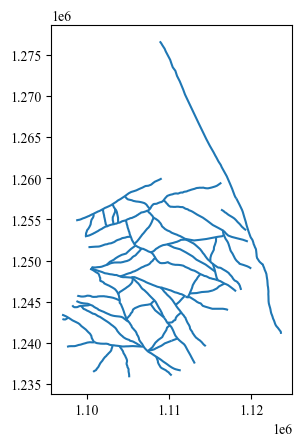

In [ ]:
faults = 'Fallas_Mesa_corregido2.shp'
faults = gp.read_file(path_shapefiles + faults)
faults.plot()

<Axes: >

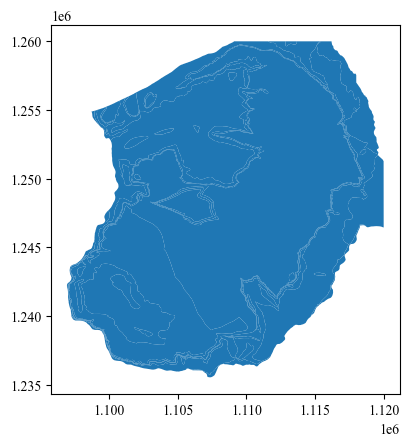

In [ ]:
geo = 'geologia_mesa_2.shp'
geo = gp.read_file(path_shapefiles + geo)
geo.plot()

## CSV map

In [ ]:
dfMapaSup = pd.read_csv(path_save_models + 'geo_mapa_sup2.csv')
dfMapaSup.columns = ['coorX', 'coorY', 'coorZ', 'distFault', 'Unidad']
dfMapaSup.head()

,coorX,coorY,coorZ,distFault,Unidad
0,1109036.77,1259898.34,1284.0,48.773613,K1ls_mi
1,1109136.77,1259898.34,1309.0,99.600276,K1ls_mi
2,1109236.77,1259898.34,1317.0,161.484813,K1ls_mi
3,1109336.77,1259898.34,1330.0,247.283448,K1ls_mi
4,1109436.77,1259898.34,1350.0,340.903116,K1ls_mi


In [ ]:
dfMapaSup['Unidad'].unique()

array(['K1ls_mi', 'J1-2j', 'OSs', 'J1gp', 'K1ls_mm', 'K1ls_ms', 'K1r',
       'K1p', 'K1t'], dtype=object)

## Data normalization

In [ ]:
dfMapaSup['codigoUnidad'] = dfMapaSup['Unidad'].replace({'OSs':0, #silgara
                                                         'J1gp':1, #granito
                                                         'J1-2j':2, #jordan
                                                         'K1ls_mi':3, #santos inf
                                                         'K1ls_mm':4, #santos med
                                                         'K1ls_ms':5, #santo sup
                                                         'K1r':6, #rosablanca
                                                         'K1p':7, #paja
                                                         'K1t':8}) #tablazo

<ipython-input-12-64f375b3c396>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfMapaSup['codigoUnidad'] = dfMapaSup['Unidad'].replace({'OSs':0, #silgara


In [ ]:
dfMapaSup['X_norm'] = (dfMapaSup['coorX'] - 1096700) / (1120100 - 1096700)
dfMapaSup['Y_norm'] = (dfMapaSup['coorY'] - 1235500) / (1260100 - 1235500)
dfMapaSup['Z_norm'] = (dfMapaSup['coorZ'] - (0)) / (1830 - (0))
dfMapaSup['Df_norm'] = (dfMapaSup['distFault'] - (000)) / (3000 - (000))
dfMapaSup.head()

,coorX,coorY,coorZ,distFault,Unidad,codigoUnidad,X_norm,Y_norm,Z_norm,Df_norm
0,1109036.77,1259898.34,1284.0,48.773613,K1ls_mi,3,0.527212,0.991802,0.701639,0.016258
1,1109136.77,1259898.34,1309.0,99.600276,K1ls_mi,3,0.531486,0.991802,0.715301,0.033200
2,1109236.77,1259898.34,1317.0,161.484813,K1ls_mi,3,0.535759,0.991802,0.719672,0.053828
3,1109336.77,1259898.34,1330.0,247.283448,K1ls_mi,3,0.540033,0.991802,0.726776,0.082428
4,1109436.77,1259898.34,1350.0,340.903116,K1ls_mi,3,0.544306,0.991802,0.737705,0.113634


In [ ]:
mapaSupEntrada = dfMapaSup[['X_norm', 'Y_norm',	'Z_norm',	'Df_norm', 'codigoUnidad']]
mapaSupEntrada

,X_norm,Y_norm,Z_norm,Df_norm,codigoUnidad
0,0.527212,0.991802,0.701639,0.016258,3
1,0.531486,0.991802,0.715301,0.033200,3
2,0.535759,0.991802,0.719672,0.053828,3
3,0.540033,0.991802,0.726776,0.082428,3
4,0.544306,0.991802,0.737705,0.113634,3
...,...,...,...,...,...
40820,0.467383,0.008063,0.240999,0.628693,2
40821,0.450289,0.003998,0.240984,0.696013,2
40822,0.454563,0.003998,0.241530,0.724802,2
40823,0.458836,0.003998,0.239966,0.699951,2


In [ ]:
mapaSupEntrada  = pd.get_dummies(mapaSupEntrada, columns=['codigoUnidad'],
                                 prefix='',
                                 dtype=int)

mapaSupEntrada.head()

,X_norm,Y_norm,Z_norm,Df_norm,_0,_1,_2,_3,_4,_5,_6,_7,_8
0,0.527212,0.991802,0.701639,0.016258,0,0,0,1,0,0,0,0,0
1,0.531486,0.991802,0.715301,0.033200,0,0,0,1,0,0,0,0,0
2,0.535759,0.991802,0.719672,0.053828,0,0,0,1,0,0,0,0,0
3,0.540033,0.991802,0.726776,0.082428,0,0,0,1,0,0,0,0,0
4,0.544306,0.991802,0.737705,0.113634,0,0,0,1,0,0,0,0,0


# Models list

In [ ]:
models_list = os.listdir(path_save_models)
models_list = [model for model in models_list if model.endswith('.pkl')]
print(len(models_list))
models_list

100


['model_map_NN_001.pkl',
 'model_map_NN_002.pkl',
 'model_map_NN_003.pkl',
 'model_map_NN_004.pkl',
 'model_map_NN_005.pkl',
 'model_map_NN_006.pkl',
 'model_map_NN_007.pkl',
 'model_map_NN_008.pkl',
 'model_map_NN_009.pkl',
 'model_map_NN_010.pkl',
 'model_map_NN_011.pkl',
 'model_map_NN_012.pkl',
 'model_map_NN_013.pkl',
 'model_map_NN_014.pkl',
 'model_map_NN_015.pkl',
 'model_map_NN_016.pkl',
 'model_map_NN_017.pkl',
 'model_map_NN_018.pkl',
 'model_map_NN_019.pkl',
 'model_map_NN_020.pkl',
 'model_map_NN_021.pkl',
 'model_map_NN_022.pkl',
 'model_map_NN_023.pkl',
 'model_map_NN_024.pkl',
 'model_map_NN_025.pkl',
 'model_map_NN_026.pkl',
 'model_map_NN_027.pkl',
 'model_map_NN_028.pkl',
 'model_map_NN_029.pkl',
 'model_map_NN_030.pkl',
 'model_map_NN_031.pkl',
 'model_map_NN_032.pkl',
 'model_map_NN_033.pkl',
 'model_map_NN_034.pkl',
 'model_map_NN_035.pkl',
 'model_map_NN_036.pkl',
 'model_map_NN_037.pkl',
 'model_map_NN_038.pkl',
 'model_map_NN_039.pkl',
 'model_map_NN_040.pkl',


## Best tested model

The variable name will be kept as **model_thesis** since it is being copied from notebook 03; however, it refers to the best model with the test score among the 100.

In [ ]:
model_thesis = path_save_models + 'model_map_NN_044.pkl'
model_thesis = joblib.load(model_thesis)

model_thesis

MLPRegressor(early_stopping=True, hidden_layer_sizes=(39, 26, 13, 7, 3),
             learning_rate='adaptive', max_iter=6000, n_iter_no_change=20,
             tol=1e-05, validation_fraction=0.2)

# Predict

# Thesis model (Model 44)

In [ ]:
dfMapaSup['Porosity thesis'] = model_thesis.predict(mapaSupEntrada)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [ ]:
dfMapaSup.head()

,coorX,coorY,coorZ,distFault,Unidad,codigoUnidad,X_norm,Y_norm,Z_norm,Df_norm,Porosity thesis
0,1109036.77,1259898.34,1284.0,48.773613,K1ls_mi,3,0.527212,0.991802,0.701639,0.016258,2.045007
1,1109136.77,1259898.34,1309.0,99.600276,K1ls_mi,3,0.531486,0.991802,0.715301,0.033200,2.203641
2,1109236.77,1259898.34,1317.0,161.484813,K1ls_mi,3,0.535759,0.991802,0.719672,0.053828,2.426700
3,1109336.77,1259898.34,1330.0,247.283448,K1ls_mi,3,0.540033,0.991802,0.726776,0.082428,2.696670
4,1109436.77,1259898.34,1350.0,340.903116,K1ls_mi,3,0.544306,0.991802,0.737705,0.113634,2.953733


## 100 models

In [ ]:
models_list

['model_map_NN_001.pkl',
 'model_map_NN_002.pkl',
 'model_map_NN_003.pkl',
 'model_map_NN_004.pkl',
 'model_map_NN_005.pkl',
 'model_map_NN_006.pkl',
 'model_map_NN_007.pkl',
 'model_map_NN_008.pkl',
 'model_map_NN_009.pkl',
 'model_map_NN_010.pkl',
 'model_map_NN_011.pkl',
 'model_map_NN_012.pkl',
 'model_map_NN_013.pkl',
 'model_map_NN_014.pkl',
 'model_map_NN_015.pkl',
 'model_map_NN_016.pkl',
 'model_map_NN_017.pkl',
 'model_map_NN_018.pkl',
 'model_map_NN_019.pkl',
 'model_map_NN_020.pkl',
 'model_map_NN_021.pkl',
 'model_map_NN_022.pkl',
 'model_map_NN_023.pkl',
 'model_map_NN_024.pkl',
 'model_map_NN_025.pkl',
 'model_map_NN_026.pkl',
 'model_map_NN_027.pkl',
 'model_map_NN_028.pkl',
 'model_map_NN_029.pkl',
 'model_map_NN_030.pkl',
 'model_map_NN_031.pkl',
 'model_map_NN_032.pkl',
 'model_map_NN_033.pkl',
 'model_map_NN_034.pkl',
 'model_map_NN_035.pkl',
 'model_map_NN_036.pkl',
 'model_map_NN_037.pkl',
 'model_map_NN_038.pkl',
 'model_map_NN_039.pkl',
 'model_map_NN_040.pkl',


In [ ]:
df_16models = pd.DataFrame()

for model in models_list:
  nn_model = model[10:16]
  model = joblib.load(path_save_models + model)
  df_16models[nn_model] = model.predict(mapaSupEntrada)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor 

In [ ]:
df_16models.head()

,NN_001,NN_002,NN_003,NN_004,NN_005,NN_006,NN_007,NN_008,NN_009,NN_010,...,NN_091,NN_092,NN_093,NN_094,NN_095,NN_096,NN_097,NN_098,NN_099,NN_100
0,2.120447,2.129919,2.382204,2.214787,2.556191,2.278248,2.350383,1.681695,2.141233,2.442732,...,2.385002,1.874477,1.748499,2.088321,2.121709,2.441016,2.539131,3.111516,2.137424,2.076959
1,2.224223,2.154183,2.345457,2.164291,2.657499,2.283043,2.572694,1.713744,2.057889,2.545929,...,2.648273,2.018289,2.121234,2.070374,2.095404,2.462870,2.554052,2.788589,1.606253,2.110215
2,2.444724,2.148911,2.270709,2.067390,2.672725,2.250430,2.733317,2.150636,1.942711,2.634237,...,2.726661,2.179234,2.119882,2.101707,1.994141,2.470980,2.475625,2.523435,0.931009,2.158124
3,2.895113,2.130953,2.164246,1.934201,2.628625,2.225232,2.928339,2.844217,1.810864,2.669763,...,2.852265,2.401650,1.909897,2.140674,1.809735,2.478973,2.438106,2.814159,0.585210,2.193929
4,3.028129,2.147865,2.053893,1.594577,2.627879,2.231496,3.156167,2.130363,1.744647,2.372689,...,3.002823,2.646875,1.697094,2.158346,1.866870,2.504736,2.373719,3.128225,0.505392,2.099033


## Mean and Standard deviation

In [ ]:
dfMapaSup['Mean 100models'] = df_16models.mean(axis=1)
dfMapaSup['Std 100models'] = df_16models.std(axis=1)

dfMapaSup.head()

,coorX,coorY,coorZ,distFault,Unidad,codigoUnidad,X_norm,Y_norm,Z_norm,Df_norm,Porosity thesis,Mean 16models,Std 16models,Mean 100models,Std 100models
0,1109036.77,1259898.34,1284.0,48.773613,K1ls_mi,3,0.527212,0.991802,0.701639,0.016258,2.045007,2.316949,0.465440,2.316949,0.465440
1,1109136.77,1259898.34,1309.0,99.600276,K1ls_mi,3,0.531486,0.991802,0.715301,0.033200,2.203641,2.341301,0.460731,2.341301,0.460731
2,1109236.77,1259898.34,1317.0,161.484813,K1ls_mi,3,0.535759,0.991802,0.719672,0.053828,2.426700,2.351061,0.570112,2.351061,0.570112
3,1109336.77,1259898.34,1330.0,247.283448,K1ls_mi,3,0.540033,0.991802,0.726776,0.082428,2.696670,2.392900,0.807898,2.392900,0.807898
4,1109436.77,1259898.34,1350.0,340.903116,K1ls_mi,3,0.544306,0.991802,0.737705,0.113634,2.953733,2.467448,1.098693,2.467448,1.098693


# Plot

In [ ]:
dfMapaSup.columns

Index(['coorX', 'coorY', 'coorZ', 'distFault', 'Unidad', 'codigoUnidad',
       'X_norm', 'Y_norm', 'Z_norm', 'Df_norm', 'Porosity thesis',
       'Mean 16models', 'Std 16models', 'Mean 100models', 'Std 100models'],
      dtype='object')

In [ ]:
dfMapaSup.describe().round(2)

,coorX,coorY,coorZ,distFault,codigoUnidad,X_norm,Y_norm,Z_norm,Df_norm,Porosity thesis,Mean 16models,Std 16models,Mean 100models,Std 100models
count,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00
mean,1108740.99,1248026.61,1263.17,522.61,3.85,0.51,0.51,0.69,0.17,5.08,4.78,1.91,4.78,1.91
std,5523.04,6250.78,363.08,401.28,2.03,0.24,0.25,0.20,0.13,4.43,4.08,1.06,4.08,1.06
min,1097036.77,1235598.34,301.12,0.05,0.00,0.01,0.00,0.16,0.00,0.14,0.13,0.30,0.13,0.30
25%,1104236.77,1242798.34,1040.00,200.96,2.00,0.32,0.30,0.57,0.07,1.71,1.59,1.24,1.59,1.24
50%,1108736.77,1248098.34,1289.00,438.81,5.00,0.51,0.51,0.70,0.15,3.73,3.55,1.59,3.55,1.59
75%,1113236.77,1253298.34,1624.00,759.42,5.00,0.71,0.72,0.89,0.25,7.10,6.86,2.26,6.86,2.26
max,1119936.77,1259898.34,1819.00,2605.49,8.00,0.99,0.99,0.99,0.87,28.03,19.65,6.94,19.65,6.94


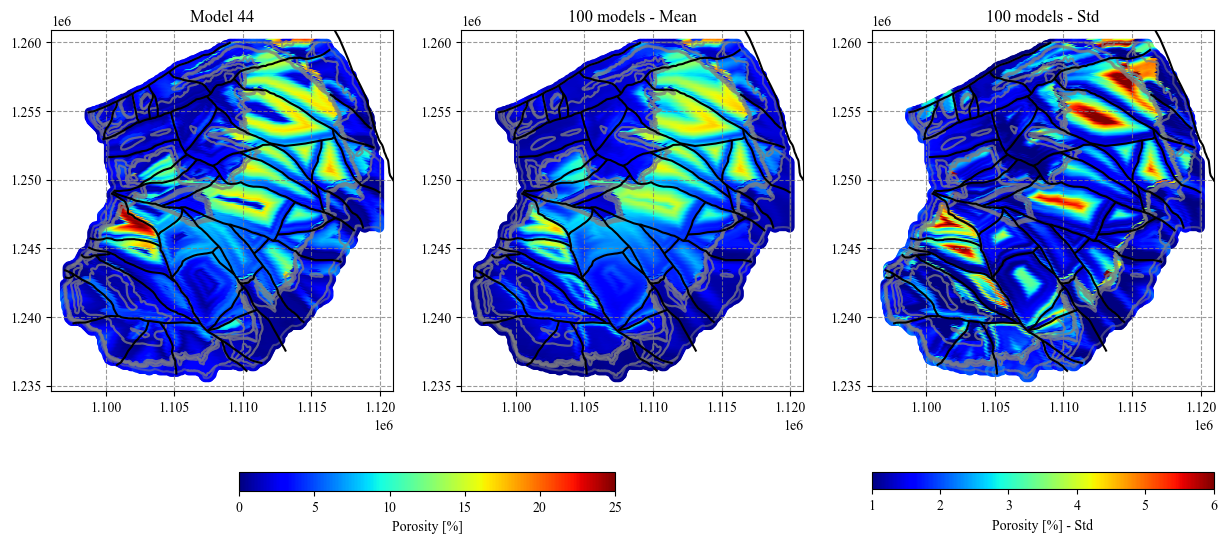

In [ ]:
x_min = dfMapaSup['coorX'].min() - 1000
x_max = dfMapaSup['coorX'].max() + 1000

y_min = dfMapaSup['coorY'].min() - 1000
y_max = dfMapaSup['coorY'].max() + 1000

fig, ax = plt.subplots(1,3, figsize=(15, 7))

mp = ax[0].scatter(dfMapaSup['coorX'], dfMapaSup['coorY'],
              c=dfMapaSup['Porosity thesis'], cmap='jet',
              vmin=0, vmax=25)
geo.boundary.plot(ax=ax[0], color="gray", alpha=0.5)
faults.plot(ax=ax[0], color="black")
ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)
ax[0].set_title('Model 44')
ax[0].grid(ls='--', color='grey', alpha=0.8)

ax[1].scatter(dfMapaSup['coorX'], dfMapaSup['coorY'],
              c=dfMapaSup['Mean 100models'], cmap='jet',
              vmin=0, vmax=25)
geo.boundary.plot(ax=ax[1], color="gray", alpha=0.5)
faults.plot(ax=ax[1], color="black")
ax[1].set_xlim(x_min, x_max)
ax[1].set_ylim(y_min, y_max)
ax[1].set_title('100 models - Mean')
ax[1].grid(ls='--', color='grey', alpha=0.8)

mp2 = ax[2].scatter(dfMapaSup['coorX'], dfMapaSup['coorY'],
                    c=dfMapaSup['Std 100models'], cmap='jet',
                    vmin=1, vmax=6)
geo.boundary.plot(ax=ax[2], color="gray", alpha=0.5)
faults.plot(ax=ax[2], color="black")
ax[2].set_xlim(x_min, x_max)
ax[2].set_ylim(y_min, y_max)
ax[2].set_title('100 models - Std')
ax[2].grid(ls='--', color='grey', alpha=0.8)

plt.colorbar(mp, ax=ax[0:2], shrink=0.5, label='Porosity [%]', orientation='horizontal')
plt.colorbar(mp2, ax=ax[2], shrink=1, label='Porosity [%] - Std', orientation='horizontal')

plt.savefig(path_save_plots + f'Maps_100models.png',
            dpi=500,
            bbox_inches = 'tight',
            pad_inches=0.25)

plt.show()

# End